In [86]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [87]:
def prepereDataWithoutLemmatisation(maximumNegativeRate, mimimumPositiveRate):
    comments = pd.read_csv('FilmWeb-detectingEmotions-lemmatisation.csv')
    comments.loc[comments.emotion == 'neutral', 'emotion'] = "negative"
    comments = comments[(comments.rate <= maximumNegativeRate) | (comments.rate >= mimimumPositiveRate)]
    comments = comments.reset_index()
    return comments

In [88]:
data = prepereDataWithoutLemmatisation(5,6)

In [89]:
def slowosiec(text):
    emotions = pd.read_csv('emotionsTable.csv')
    text = text.replace("[", "")
    text = text.replace(" ", "")
    text = text.replace("]", "")
    words_list = text.split(',')
    numberOfWords = len(words_list)
    result = 0
    if(numberOfWords > 0):
        emotionsCounter = 0
        for el in words_list: 
            if((emotions['word'] == el)).any():
                emotionsCounter += float(emotions.loc[emotions['word'] == el]['sentiment'].mean())  
        result = emotionsCounter/numberOfWords
    return result

In [90]:
def detectEmotion(text):
    return text.apply(slowosiec).apply(getEmotionStatusOfText)

In [91]:
def getEmotionStatusOfText(result):
    if(result <= 0):
        return 'negative'
    elif(result > 0):
        return 'positive'

In [92]:
data['detectedEmotion'] = detectEmotion(data['text'])

In [93]:
def get_length(text):
    return len(text)

def get_length_bin(length):
    return length / 10

def get_score(result):
    return 1 if result else 0

def prepereDataForPlot(result_df):
    result_df['correct_guess'] = result_df['detectedEmotion'] == result_df['emotion']
    result_df['score'] = map(get_score, result_df['correct_guess'])
    result_df['text_length'] = map(get_length, result_df['text'])
    #create group with 10 elements
    result_df['text_length_bin'] = map(get_length_bin, result_df['text_length'])    
    grouped = result_df.groupby('text_length_bin', as_index=False)['score'].mean()
    return [result_df, grouped]

In [94]:
newData = prepereDataForPlot(data)

In [95]:
def createPlot(data):
    fig, ax = plt.subplots()
    x = data.text_length_bin * 10
    y = data.score
    fit = np.polyfit(x, y, deg=1)
    ax.plot(x, fit[0] * x + fit[1], color='red')
    ax.scatter(x, y)

    fig.show()

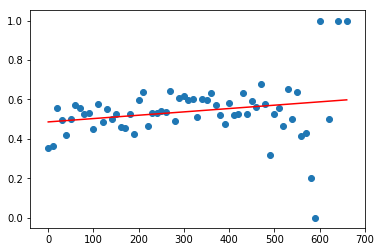

In [96]:
createPlot(newData[1])

In [99]:
def changeRangeOfComments(maximumNegativeRate, mimimumPositiveRate, comments):
    comments = comments[(comments.rate <= maximumNegativeRate) | (comments.rate >= mimimumPositiveRate)]
    comments = comments.reset_index()
    return comments

In [100]:
newData[0].to_csv('FilmWeb-detectedEmotions-.csv', encoding='utf-8', index=False)

,index,emotion,rate,text,detectedEmotion,correct_guess,score,text_length,text_length_bin
0,0,positive,6.0,"[wiek, kolano, dla, wszystek, wszyscy, facet, ...",positive,True,1,367,36
1,1,negative,2.0,"[gówno, wiek, srebrny, ja, się, to, ten, filmi...",negative,True,1,423,42
2,2,positive,6.0,"[zaskoczyć, zaskoczenie, Oda, raz, zaznaczyć, ...",positive,True,1,438,43
3,3,negative,1.0,"[chyba, dobrze, opisywać, to, ten, wiek, tym, ...",negative,True,1,372,37
4,4,positive,8.0,"[on, nie, wiedzieć, czy, to, ten, zauważyć, al...",negative,False,0,198,19
5,5,negative,5.0,"[taka, tak, złe, zły, jak, jaka]",negative,True,1,34,3
6,6,negative,2.0,"[gdyby, ktoś, próbować, uratować, ten, film, p...",positive,False,0,438,43
7,7,negative,1.0,"[dla, leming, ujemny, film, on, nie, być, on, ...",negative,True,1,226,22
8,8,negative,4.0,"[dla, ubogi, mieszczka, młody, młodsza, młodsz...",negative,True,1,444,44
9,9,negative,3.0,"[aktorski, na, poziom, polski, reprezentacja, ...",negative,True,1,138,13
